# BFS-Breadth First Search 广度优先搜索
# DFS-Deep First Search 深度优先搜索

In [1]:
import networkx
%matplotlib inline

In [2]:
graph = {
    'A' : 'B C',
    'B' : 'A C',
    'C' : 'A B D E',
    'D' : 'C',
    'E' : 'C F',
    'F' : 'E'
}

In [3]:
for k in graph:
    graph[k] = set(graph[k].split())

In [4]:
graph

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D', 'E'},
 'D': {'C'},
 'E': {'C', 'F'},
 'F': {'E'}}

In [5]:
graph2 = networkx.Graph(graph)

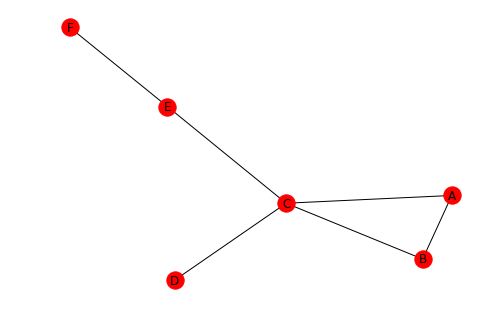

In [6]:
networkx.draw(graph2,with_labels=True)

In [7]:
seen = set()

In [8]:
need_visit = ['A']

## BFS

In [9]:
while need_visit:
    node = need_visit.pop(0)
    if node in seen: continue
    print('Looking for {}'.format(node))
    need_visit += graph[node]
    seen.add(node)

Looking for A
Looking for C
Looking for B
Looking for D
Looking for E
Looking for F


## DFS

In [10]:
graph_dfs = {
    '1' : '2 7',
    '2' : '3',
    '3' : '4',
    '4' : '5',
    '5' : '6 10',
    '6' : '5',
    '7' : '8',
    '8' : '9',
    '9' : '10',
    '10' : '5 11',
    '11' : '12',
    '12' : '11'
}

In [11]:
for n in graph_dfs : graph_dfs[n] = graph_dfs[n].split()
graph_dfs

{'1': ['2', '7'],
 '2': ['3'],
 '3': ['4'],
 '4': ['5'],
 '5': ['6', '10'],
 '6': ['5'],
 '7': ['8'],
 '8': ['9'],
 '9': ['10'],
 '10': ['5', '11'],
 '11': ['12'],
 '12': ['11']}

In [12]:
graph_dfs2 = networkx.Graph(graph_dfs)

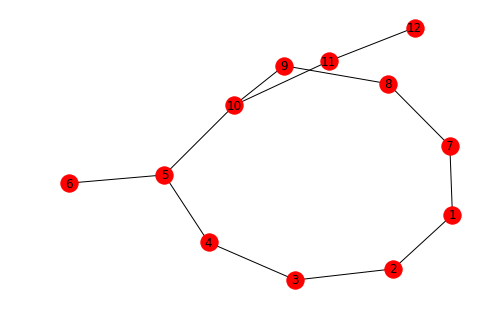

In [13]:
networkx.draw(graph_dfs2,with_labels=True)

In [14]:
seen2 = set()

In [15]:
need_visit2 = ['1']

In [16]:
while need_visit2:
    node = need_visit2.pop(0)
    if node in seen2 : continue
    print('Looking for {}'.format(node))
    need_visit2 = graph_dfs[node] + need_visit2
    print(need_visit2)
    seen2.add(node)
    

Looking for 1
['2', '7']
Looking for 2
['3', '7']
Looking for 3
['4', '7']
Looking for 4
['5', '7']
Looking for 5
['6', '10', '7']
Looking for 6
['5', '10', '7']
Looking for 10
['5', '11', '7']
Looking for 11
['12', '7']
Looking for 12
['11', '7']
Looking for 7
['8']
Looking for 8
['9']
Looking for 9
['10']


## common

In [17]:
def search (graph,concat_func):
    seen = set()
    need_visit = ['1']
    
    while need_visit:
        node = need_visit.pop(0)
        if node in seen: continue
        print("Looking for {}".format(node))
        seen.add(node)
        new_discover = graph[node]
        need_visit = concat_func(new_discover,need_visit)

In [18]:
def bfs_discover_func(new_discover,need_visit):
    return need_visit + new_discover
    

In [19]:
def dfs_discover_func(new_discover,need_visit):
    return new_discover + need_visit

In [20]:
search(graph_dfs,dfs_discover_func)

Looking for 1
Looking for 2
Looking for 3
Looking for 4
Looking for 5
Looking for 6
Looking for 10
Looking for 11
Looking for 12
Looking for 7
Looking for 8
Looking for 9


In [21]:
search(graph_dfs,bfs_discover_func)

Looking for 1
Looking for 2
Looking for 7
Looking for 3
Looking for 8
Looking for 4
Looking for 9
Looking for 5
Looking for 10
Looking for 6
Looking for 11
Looking for 12


## Partial 偏函数

In [22]:
from functools import partial

In [23]:
 dfs = partial(search,concat_func=dfs_discover_func)

In [24]:
dfs(graph_dfs)

Looking for 1
Looking for 2
Looking for 3
Looking for 4
Looking for 5
Looking for 6
Looking for 10
Looking for 11
Looking for 12
Looking for 7
Looking for 8
Looking for 9


In [25]:
bfs = partial(search,concat_func= bfs_discover_func)

In [26]:
bfs(graph_dfs)

Looking for 1
Looking for 2
Looking for 7
Looking for 3
Looking for 8
Looking for 4
Looking for 9
Looking for 5
Looking for 10
Looking for 6
Looking for 11
Looking for 12


## Mapping

In [27]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLJ = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

In [28]:
air_route = {
    BJ : {SZ,GZ,WH,HLJ,NY,CM},
    GZ : {WH,BJ,CM},
    SZ : {BJ,SG},
    WH : {BJ,GZ},
    HLJ : {BJ,CM},
    CM : {GZ,HLJ,BJ},
    NY : {BJ}
}

In [29]:
print(air_route)

{'Beijing': {'Shenzhen', 'Guangzhou', 'New York City', 'Wuhan', 'Heilongjiang', 'Chiangmai'}, 'Guangzhou': {'Wuhan', 'Beijing', 'Chiangmai'}, 'Shenzhen': {'Beijing', 'Singapore'}, 'Wuhan': {'Guangzhou', 'Beijing'}, 'Heilongjiang': {'Beijing', 'Chiangmai'}, 'Chiangmai': {'Guangzhou', 'Beijing', 'Heilongjiang'}, 'New York City': {'Beijing'}}


In [30]:
air_route = networkx.Graph(air_route)

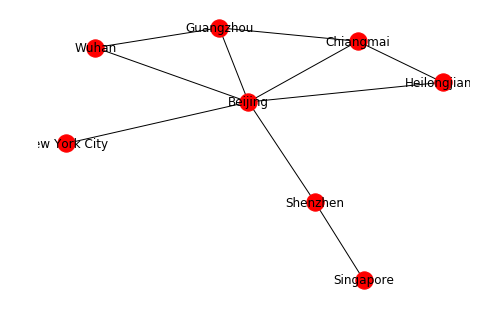

In [31]:
networkx.draw(air_route,with_labels=True)

In [32]:
def search_destination(graph, start, destination):
    pathes = [[start]]
    seen = set()
    found_path = []
    while pathes:
        #print(pathes)
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen : continue
        #print(path)
        seen.add(froniter)
        
        for city in graph[froniter]:
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination : found_path.append(new_path)
    return found_path

In [33]:
def draw_route(cities): return  ' ✈ '.join(cities)

In [34]:
routes = search_destination(air_route,SG, CM)

In [35]:
for e in routes:
    print(draw_route(e))

Singapore ✈ Shenzhen ✈ Beijing ✈ Chiangmai
Singapore ✈ Shenzhen ✈ Beijing ✈ Guangzhou ✈ Chiangmai
Singapore ✈ Shenzhen ✈ Beijing ✈ Heilongjiang ✈ Chiangmai
